<a href="https://colab.research.google.com/github/KatoriButayarou/Colaboratory/blob/main/img2img_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion Sample

Stable DiffusionのサンプルコードをGoogle Colabで実行するためのノートブックです。

本ノートブックの使い方は以下のzennの記事を参照ください。

[Stable Diffusionのサンプルコード(text2img/img2img)をGoogle Colabで動かす方法](https://zenn.dev/karaage0703/articles/22ee47b71fab9c)


## 事前準備

ランタイムのランタイムのタイプを変更で「ハードウェア　アクセラレータ」をGPUに設定します。

以下コマンド事項して、GPUが使われていることを確認してください。

In [ ]:
!nvidia-smi

Wed Aug 24 16:14:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Google Driveをマウントします（事前にGoogleアカウントを取得しておいてください）

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


モデルがあることを確認します。

In [ ]:
!ls -lh drive/MyDrive/stable_diffusion

total 4.0G
-rw------- 1 root root 4.0G Aug 24 15:50 sd-v1-4.ckpt


`stable-diffusion`のリポジトリをgitでcloneします。

In [ ]:
!git clone https://github.com/CompVis/stable-diffusion

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 313, done.
remote: Total 313 (delta 0), reused 0 (delta 0), pack-reused 313
Receiving objects: 100% (313/313), 42.64 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (107/107), done.


Google Driveのstable_diffusionのモデルを`stable-diffusion`のディレクトリにコピーします。Google Driveへのモデルのアップロードに関しては、以下記事を参照に準備ください。


[Stable Diffusionのサンプルコード(text2img/img2img)をGoogle Colabで動かす方法](https://zenn.dev/karaage0703/articles/22ee47b71fab9c)


In [ ]:
%%time
!mkdir stable-diffusion/models/ldm/stable-diffusion-v1
!cp drive/MyDrive/stable_diffusion/sd-v1-4.ckpt stable-diffusion/models/ldm/stable-diffusion-v1/model.ckpt

CPU times: user 231 ms, sys: 47.2 ms, total: 279 ms
Wall time: 34.7 s


`stable-diffusion`のディレクトリに移動します。

In [ ]:
%cd stable-diffusion

/content/stable-diffusion


必要なライブラリをインストールします。

In [ ]:
!pip install -qq omegaconf einops pytorch-lightning transformers kornia invisible-watermark transformers

     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 705 kB 33.4 MB/s 
     |████████████████████████████████| 4.7 MB 63.2 MB/s 
     |████████████████████████████████| 517 kB 72.0 MB/s 
     |████████████████████████████████| 1.6 MB 51.8 MB/s 
     |████████████████████████████████| 117 kB 78.1 MB/s 
     |████████████████████████████████| 419 kB 69.9 MB/s 
     |████████████████████████████████| 5.9 MB 53.5 MB/s 
     |████████████████████████████████| 120 kB 75.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.9 MB/s 
     |████████████████████████████████| 4.9 MB 54.6 MB/s 
     |████████████████████████████████| 13.1 MB 48.6 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
     |████████████████████████████████| 86 kB 7.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+z

In [ ]:
!pip install -qq -e .
!pip install -qq -e git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
!pip install -qq -e git+https://github.com/openai/CLIP.git@main#egg=clip

     |████████████████████████████████| 53 kB 2.0 MB/s 


In [ ]:
!pip install -qq diffusers==0.2.4

     |████████████████████████████████| 112 kB 14.6 MB/s 


## サンプルプログラムの実行

### txt2img

プロンプト（指示語）から画像を生成します。

In [ ]:
!python scripts/txt2img.py --prompt "a photograph of an astronaut riding a horse" --plms

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.4.mlp.fc2.weight', 'vision_model.encoder.layers.23.layer_norm2.weight', 'vision_model.encoder.layers.9.self_attn.q_proj.bias', 'vision_model.encoder.layers.6.self_attn.v_proj.bias', 'vision_model.encoder.layers.17.mlp.fc1.bias', 'vision_model.encoder.layers.19.layer_norm2.weight', 'vision_model.encoder.layers.7.layer_norm2.bias', 'vision_model.encoder.layers.15.self_attn.v_proj.bias', 'vision_model.encoder.layers.14.layer_norm2.bias', 'vision_model.encoder.layers.21.self_attn.v_proj.bias',

生成した画像を確認します。

In [ ]:
import cv2
from IPython.display import Image as IPImage
from IPython.display import display_jpeg, display_png

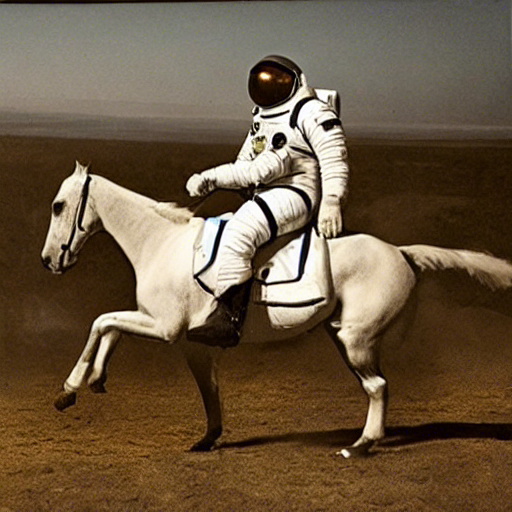

In [ ]:
display_png(IPImage('outputs/txt2img-samples/samples/00000.png'))

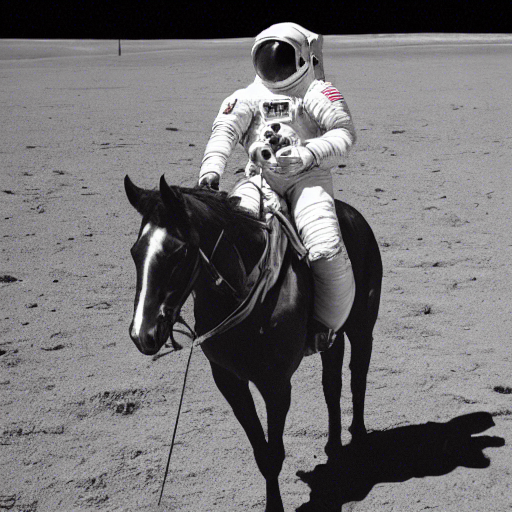

In [ ]:
display_png(IPImage('outputs/txt2img-samples/samples/00001.png'))

### img2img

変換元の画像をダウンロードして、リサイズします。
リサイズしてサイズを小さくしているのは、GPUのメモリ不足を防ぐためです。

またサイズにも制約があるようです`512 x 256`以外のサイズだとエラーになります（エラーにならない範囲は調査中です）。

In [ ]:
!wget -O test.jpg https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg

--2022-08-24 16:30:04--  https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 369038 (360K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 360.39K  --.-KB/s    in 0.01s   

2022-08-24 16:30:04 (29.8 MB/s) - ‘test.jpg’ saved [369038/369038]



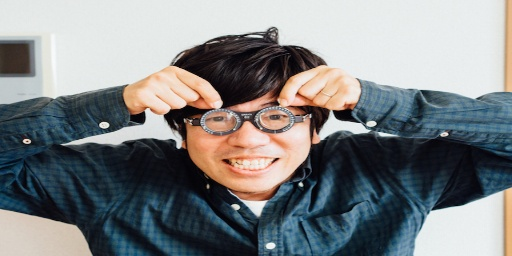

In [ ]:
img = cv2.imread('test.jpg')
img = cv2.resize(img, dsize=(512, 256))
cv2.imwrite('test_small.jpg', img)
display_jpeg(IPImage('test_small.jpg'))

In [ ]:
!wget -O sample.jpg https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg

--2022-08-24 16:25:48--  https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178529 (174K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>] 174.34K  --.-KB/s    in 0.008s  

2022-08-24 16:25:48 (21.3 MB/s) - ‘sample.jpg’ saved [178529/178529]



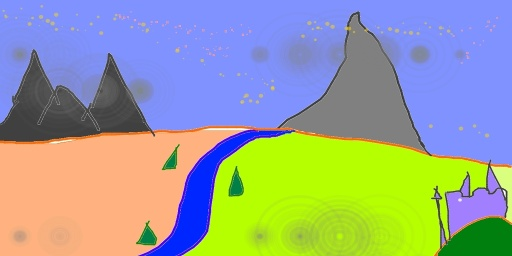

In [ ]:
img = cv2.imread('sample.jpg')
img = cv2.resize(img, dsize=(512, 256))
cv2.imwrite('sample_small.jpg', img)
display_jpeg(IPImage('sample_small.jpg'))

画風変換をします。

In [ ]:
!python scripts/img2img.py --prompt "zombie, ukiyoe" --init-img test_small.jpg --strength 0.8

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.20.self_attn.q_proj.bias', 'vision_model.encoder.layers.14.mlp.fc1.bias', 'vision_model.encoder.layers.11.layer_norm2.bias', 'vision_model.encoder.layers.10.mlp.fc1.bias', 'vision_model.encoder.layers.18.self_attn.v_proj.bias', 'vision_model.encoder.layers.15.self_attn.q_proj.bias', 'vision_model.encoder.layers.3.layer_norm2.bias', 'vision_model.encoder.layers.14.mlp.fc1.weight', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.14.self_attn.v_proj.bias', 'vision

生成画像を確認します。

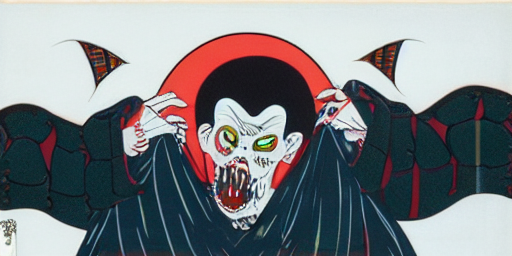

In [ ]:
display_png(IPImage('outputs/img2img-samples/samples/00000.png'))

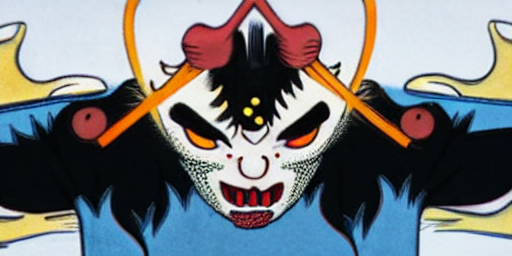

In [ ]:
display_png(IPImage('outputs/img2img-samples/samples/00001.png'))

もう1枚を画風変換します。

In [ ]:
!python scripts/img2img.py --prompt "A fantasy landscape, trending on artstation" --init-img sample_small.jpg --strength 0.8

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.22.mlp.fc1.weight', 'vision_model.pre_layrnorm.bias', 'vision_model.encoder.layers.22.self_attn.q_proj.weight', 'vision_model.encoder.layers.16.mlp.fc2.bias', 'vision_model.encoder.layers.10.mlp.fc1.bias', 'vision_model.encoder.layers.2.mlp.fc1.weight', 'vision_model.encoder.layers.22.self_attn.v_proj.bias', 'vision_model.encoder.layers.0.mlp.fc2.weight', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vision_model.encoder.layers.8.self_attn.v_proj.weight', 'vision_model.encoder.layers.2

生成画像を確認します。

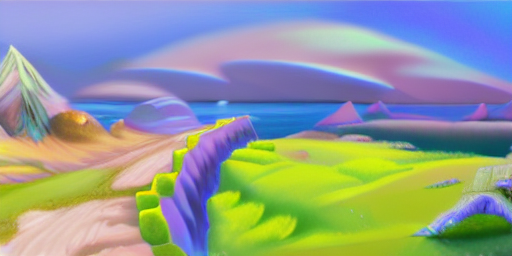

In [ ]:
display_png(IPImage('outputs/img2img-samples/samples/00002.png'))

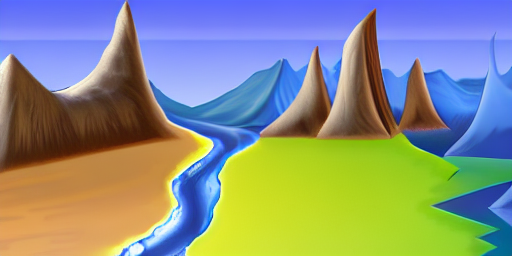

In [ ]:
display_png(IPImage('outputs/img2img-samples/samples/00003.png'))

# まとめ

サンプルを動かしてみました。
後は色々改造して遊べそうですね。

# Reference
- https://karaage.hatenadiary.jp/entry/2018/12/17/073000
- https://zenn.dev/karaage0703/scraps/f84c98a8b78290
- https://www.reddit.com/r/StableDiffusion/comments/wv2msc/stable_diffusion_img2img_google_collab_setup_guide/
- https://www.reddit.com/r/StableDiffusion/comments/wuyu2u/how_do_i_run_stable_diffusion_and_sharing_faqs/
- https://note.nkmk.me/python-opencv-video-to-still-image/